Group 60,MD ZAMAN,14106583

## Lab 5 Solving a multi-class classification problem using a FNN (MLP)

Mount Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/60_14106583_AT2_miniP3_notebook

/content/drive/MyDrive/60_14106583_AT2_miniP3_notebook


In [3]:
#import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model, save_model
from keras.layers import Dense, Dropout


In [5]:
#Read csv file containing the dataset and name the columns
df = pd.read_csv('data/mfeat-zernike.csv',names = ['id','att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12','att13','att14','att15','att16','att17','att18','att19','att20','att21','att22','att23','att24','att25','att26','att27','att28','att29','att30','att31','att32','att33','att34','att35','att36','att37','att38','att39','att40','att41','att42','att43','att44','att45','att46','att47','class'] )

In [6]:
#Show first 10 cases
df.head(10)

,id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att39,att40,att41,att42,att43,att44,att45,att46,att47,class
0,1,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,...,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208458,1
1,2,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,...,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567,1
2,3,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,...,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691,1
3,4,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,...,14.179518,30.564085,7.097728,173.840758,441.350376,3.706023,13.432311,51.739930,574.887814,1
4,5,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,...,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513,1
5,6,0.229780,5.042077,40.442847,142.718378,120.586600,238.713474,193.363034,0.031558,0.754167,...,10.570782,97.581195,21.335305,222.957245,451.432607,2.592809,64.448681,67.431997,555.304332,1
6,7,0.068383,0.929085,29.995907,120.285912,149.906770,556.821636,66.873006,0.049044,2.232918,...,27.689348,6.637128,2.110440,172.713737,273.186742,7.144262,10.642549,55.283107,511.194536,1
7,8,0.029408,0.608213,3.954453,15.007775,107.223791,471.335713,247.380455,0.044699,1.318604,...,26.604415,11.409401,7.062444,175.498979,301.078023,6.839167,15.515805,53.551123,512.603587,1
8,9,0.049459,2.799800,39.063424,120.850583,191.239561,563.061573,70.507455,0.055096,0.539381,...,13.372635,11.609861,3.544209,176.333275,234.956563,2.851916,15.304698,58.374692,509.291575,1
9,10,0.029015,1.414690,27.854160,107.554523,151.137123,466.419164,115.831168,0.060311,1.259536,...,8.170329,31.418570,2.458406,169.022917,328.087890,2.119944,19.089455,50.804047,496.225484,1


It is visible that id number has no relationship with target class.

Delete ID column

In [7]:
# Use df.drop() to drop column
#Set axix=1 to drop whole column
df = df.drop(['id'], axis=1)

Allocate data and label. Attributes should be set as data and class should be the label.

In [8]:
X=df.iloc[:,0:47]
y=df.iloc[:,-1]
y = y-1

print(X)
print(y)

          att1      att2       att3       att4        att5        att6  \
0     0.011033  0.831466  15.351804  75.806559  171.554214  490.156556   
1     0.038271  1.166746  10.526913  42.369276   85.187116  420.360566   
2     0.042698  1.225007   8.273804  31.744786   54.448177  404.103204   
3     0.032418  1.638247  19.205283  51.196682   57.181760  429.052011   
4     0.015866  0.611561   8.627839  37.325052   48.509025  459.909634   
...        ...       ...        ...        ...         ...         ...   
1995  0.018696  0.060507   4.189839  20.072573  136.863862  364.365567   
1996  0.025601  0.373184   8.199696  36.255929   63.651474  217.184626   
1997  0.024194  0.785229   9.852438  47.772260   71.338044  381.053077   
1998  0.010046  0.238167   1.285469  11.191213   81.659420  414.859326   
1999  0.029740  0.776844   9.829897  40.587122   51.188137  148.020770   

            att7      att8      att9      att10  ...     att38      att39  \
0     206.416027  0.122135  2.6016

### Split dataset for training and testing

Split the dataset into four lists which are train_data,train_label,test_data_test_label where label represents the target class.

Assign 25% of the dataset for testing and the rest for training.

In [9]:
train_data, test_data, train_label_classes, test_label_classes = train_test_split(X,y, test_size = 0.25, random_state = 42)

Convert train_label_classes and test_label_classes to categorical matrix 




Use keras.utils.to_categorical() to encode train_label_classes and test_label_classes . This will return binary matrix of '0' or '1' where columns are the number of different classes(10) and rows are the number of classes(labels)

In [10]:
train_label_encoded = keras.utils.to_categorical(train_label_classes, 10, dtype ="uint8") 
test_label_encoded = keras.utils.to_categorical(test_label_classes, 10, dtype ="uint8")
print (train_label_encoded)

[[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
#Print the classes to understand how encoding works
print(train_label_classes)

1738    8
548     2
936     4
1389    6
1607    8
       ..
1130    5
1294    6
860     4
1459    7
1126    5
Name: class, Length: 1500, dtype: int64


### Set aside ten futureSample dataset


In [12]:
futureSample_data= test_data[-10:]
futureSample_label= test_label_encoded[-10:]
futureSample_label_classes= test_label_classes[-10:]

In [13]:
test_data = test_data[:-10]
test_label = test_label_encoded[:-10]
test_label_classes = test_label_classes[:-10]

### Use training dataset to train the FNN(Multi-layer Perceptron) model

####Configure the model and neuron layers
Store the number of neurons in each layer in variables.

Set epochs to 20 to run the algorigthm 20 times over the training dataset 


In [14]:
input_dim   = train_data.shape[1] 
n_neurons_1   = 1024           
n_neurons_2   = 1024
n_neurons_3   = 512  
                
epochs      = 20           

In [15]:
# add the neuron layers to the model
# add 2 dropout layers
# create a keras.Sequential(), to cluster a linear stack of layers into a keras.Model, called a model 
# use input_dim as the input shape argument
# set the activation function to 'relu'
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(Dense(n_neurons_1,activation='relu'))
# add dropout(0.2) to randomly dropout nodes with a probability of 20%
model.add(Dropout(0.2)) 
model.add(Dense(n_neurons_2, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(n_neurons_3,activation='relu'))

#set softmax as the activation function for the last layer
model.add(Dense(10, activation=tf.keras.activations.softmax))

Print the number of layers in the model

In [16]:
print (len(model.layers))
#print layers for understanding purpose
print(model.layers)

6
[<keras.layers.core.dense.Dense object at 0x7fdc96fdc910>, <keras.layers.regularization.dropout.Dropout object at 0x7fdc96fa3550>, <keras.layers.core.dense.Dense object at 0x7fdc96fa3fd0>, <keras.layers.regularization.dropout.Dropout object at 0x7fdc96fa3050>, <keras.layers.core.dense.Dense object at 0x7fdd046cc710>, <keras.layers.core.dense.Dense object at 0x7fdc92cb77d0>]


Compile the model 

In [17]:
# Use ''categorical_crossentropy' as loss function 
# Use adam as optimizer to use the stochastic gradient descent method
# Use accuracy metrics to determine how often predicted and actual labels match
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train model with train data and train_label_encoded

In [18]:
# set batch size to 10
# set verbose to 0 to skip the information as the algorithm runs over the training dataset
model.fit(train_data, train_label_encoded, epochs=epochs, batch_size=20, verbose=0)

Predict test_Data using the model

In [19]:
predictions = model.predict(test_data)
#set threshold to 0.5 where values over 0.5 is classified as true
# use *1 to convert true,false to binary numbers 1,0 respectively
y_preds = (predictions > 0.5)*1


16/16 [==============================] - 0s 5ms/step


Print predictions and y_preds after binary conversion to understand how labels are classified using the threshold

In [20]:
print(predictions[1])
print(y_preds[1])

[4.8796878e-10 9.9094081e-01 8.6392028e-08 2.0511552e-06 9.0527683e-03
 3.9603169e-06 6.3331022e-08 3.8642414e-09 8.2534450e-09 1.6029664e-07]
[0 1 0 0 0 0 0 0 0 0]


### Evaluate the model's predictions of the training dataset 

In [21]:
# evaluate using model.evaluate() to get loss and metrics values 
scores = model.evaluate(test_data, test_label, verbose = 0)
print(scores)

[0.4441453218460083, 0.844897985458374]


In [22]:
# evaluate using accuracy_score()
score_test = accuracy_score(y_preds, test_label)
print (score_test)

0.8387755102040816


In [23]:
# evaluate using precision_score 
metrics.precision_score(test_label, y_preds, average='weighted')

0.8530322261871225

In [24]:
# evaluate using recall_score
metrics.recall_score(test_label, y_preds, average='weighted')

0.8387755102040816

In [25]:
# evaluate using f1_score
metrics.f1_score(test_label, y_preds, average='weighted')

0.8347986160560811

Get the class numbers from the binary values stored in y_preds

In [26]:
# Use np.argmax() to get the indices where binary value is 1(true) for every label
# following code returns a list of the classified labels
y_preds = [np.argmax(y, axis=None, out=None) for y in y_preds]

In [27]:
#print y_preds
print(y_preds)

[9, 1, 9, 4, 9, 9, 4, 8, 0, 6, 0, 9, 5, 2, 1, 1, 3, 0, 8, 9, 3, 8, 5, 5, 6, 0, 5, 4, 0, 0, 3, 4, 2, 4, 5, 2, 1, 9, 5, 1, 0, 9, 1, 2, 7, 4, 2, 4, 0, 8, 7, 1, 7, 1, 4, 8, 9, 1, 5, 1, 7, 3, 8, 5, 9, 9, 4, 7, 0, 7, 7, 1, 9, 5, 3, 1, 8, 3, 1, 9, 0, 4, 7, 7, 8, 7, 8, 2, 1, 8, 7, 1, 1, 1, 1, 9, 3, 9, 7, 9, 4, 4, 2, 0, 1, 4, 3, 1, 3, 2, 3, 7, 5, 8, 3, 1, 5, 4, 1, 8, 9, 0, 5, 2, 1, 7, 2, 4, 5, 1, 6, 9, 3, 2, 4, 9, 9, 9, 0, 7, 6, 1, 8, 4, 7, 2, 3, 9, 4, 0, 8, 4, 3, 5, 1, 0, 2, 8, 2, 8, 3, 4, 8, 3, 6, 0, 8, 0, 1, 8, 3, 3, 9, 6, 2, 9, 6, 0, 4, 8, 9, 3, 6, 5, 4, 3, 9, 8, 5, 6, 1, 1, 6, 1, 0, 2, 5, 4, 3, 7, 6, 2, 0, 3, 2, 4, 7, 9, 5, 0, 8, 0, 1, 0, 4, 0, 5, 1, 2, 9, 4, 0, 2, 5, 9, 9, 2, 0, 8, 1, 9, 1, 8, 7, 8, 1, 4, 4, 9, 2, 3, 7, 2, 4, 9, 0, 4, 9, 4, 9, 5, 1, 0, 2, 7, 5, 2, 3, 9, 9, 0, 9, 0, 7, 5, 7, 1, 0, 1, 5, 0, 9, 3, 8, 9, 9, 0, 2, 7, 1, 9, 7, 3, 9, 9, 0, 1, 8, 0, 0, 9, 7, 7, 8, 2, 1, 0, 8, 9, 2, 2, 0, 9, 7, 3, 0, 5, 9, 4, 0, 5, 8, 9, 4, 5, 2, 7, 7, 9, 7, 0, 8, 0, 1, 4, 2, 9, 3, 8, 3, 2, 2, 7, 

Print confusion_matrix of actual test_labels and predicted test_labels

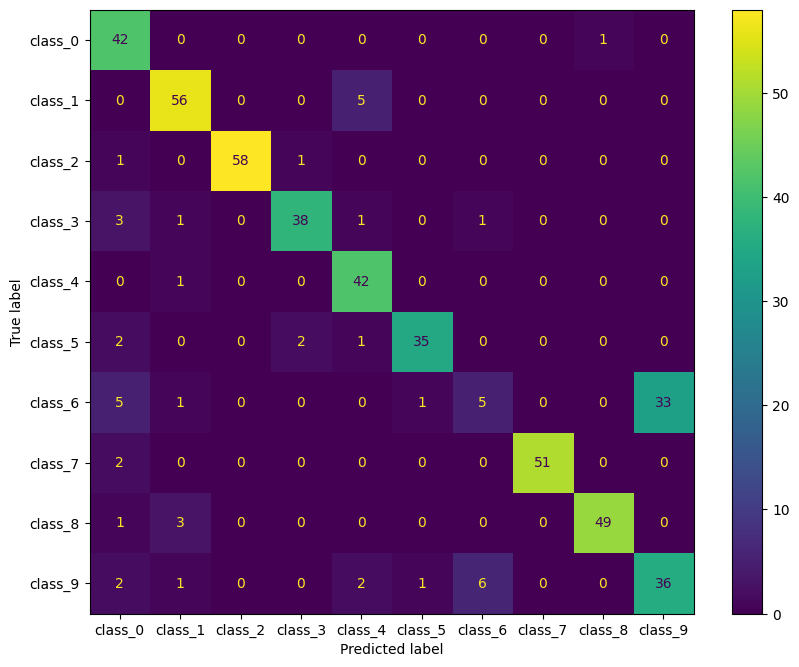

In [28]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 100)
cm = confusion_matrix(test_label_classes, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels = ['class_0', 'class_1', 'class_2','class_3', 'class_4', 'class_5','class_6', 'class_7', 'class_8','class_9']) 
cmp.plot(ax=ax)

In [29]:
print(metrics.classification_report(test_label_classes, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        43
           1       0.89      0.92      0.90        61
           2       1.00      0.97      0.98        60
           3       0.93      0.86      0.89        44
           4       0.82      0.98      0.89        43
           5       0.95      0.88      0.91        40
           6       0.42      0.11      0.18        45
           7       1.00      0.96      0.98        53
           8       0.98      0.92      0.95        53
           9       0.52      0.75      0.62        48

    accuracy                           0.84       490
   macro avg       0.82      0.83      0.81       490
weighted avg       0.83      0.84      0.82       490



###Save the model

In [30]:
# save model as 'model.h5'
model.save("model.h5")

In [31]:
# create loaded_model to hold the model 'model.h5'
loaded_model = load_model ('model.h5')

In [32]:
# print model summary 
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              49152     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,628,682
Trainable params: 1,628,682
Non-

### Use the model to predict the future sample dataset 
    


Use the futureSample_data which resembles input data in a real world scenario 

In [33]:
print(futureSample_data)

          att1      att2       att3        att4        att5        att6  \
1565  0.138278  3.676818  23.574186   67.189224   93.188710  165.381968   
425   0.093788  3.597452  30.993227   38.474076   82.803892  241.180560   
1874  0.202345  1.453540  41.403457  176.509406  195.715181  361.099499   
532   0.099683  2.872903  24.059855   51.399906  109.929888  183.248159   
752   0.016797  1.790033  19.051706   21.378024  120.290193  269.877926   
765   0.119151  3.026546  19.297577   39.335432  219.375970  149.645400   
1356  0.032795  0.771277   9.253995   30.167563  105.635625  296.266029   
408   0.080626  1.518953  13.659979   79.502155   86.184953  152.934710   
1614  0.027002  1.214048  18.714453   70.686059   85.248729  358.069752   
694   0.066746  1.311924  12.747376   16.751104  120.776985  218.163174   

            att7      att8      att9      att10  ...     att38      att39  \
1565   80.209104  0.261018  1.329896  45.957078  ...  8.531440  45.177551   
425   110.910166  0.

Use loaded_model to predict futureSample_Data

In [34]:
predictions_val = loaded_model.predict(futureSample_data)
# Set threshold and convert to binary numbers
y_preds_val = (predictions_val > 0.5)*1
print(y_preds_val)

1/1 [==============================] - 0s 71ms/step
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]]


peint actual futureSample label for comparison 

In [35]:
#print actual futureSample label
print(futureSample_label)

[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]]


In [36]:
# Use model.evaluate to get loss and metrics scores
validation_scores = loaded_model.evaluate(futureSample_data, futureSample_label, verbose = 0)
print(validation_scores)

[0.5028178095817566, 0.699999988079071]


In [37]:
# Use np.argmax() to get the indices where binary value is 1(true) for every label
# following code returns a list of the classified labels
y_preds_final = [np.argmax(y, axis=None, out=None) for y in y_preds_val]
print(y_preds_final)

[0, 2, 9, 2, 3, 0, 9, 2, 8, 3]


Compare predicted values with the actual futureSample labels

In [38]:
print("The predicated classes are {} vs the true classes are {}".format(y_preds_final, futureSample_label_classes.values))

The predicated classes are [0, 2, 9, 2, 3, 0, 9, 2, 8, 3] vs the true classes are [7 2 9 2 3 3 6 2 8 3]
